In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import StratifiedKFold

In [2]:
data = pd.read_csv("data_icu.csv")
data = data.rename(columns={"icu_length": "inpatient"})
data = data.drop(columns=['death_inhosp','Mahalanobis','age_group','caseid','subjectid'])
data.head()

,Age,Ht,Wt,Sex,OP_time,Open,Robotic,Videoscopic,icu_days,inpatient
0,18.0,175.1,59.2,0,292.55,1,0,0,3,1
1,0.7,64.1,8.9,1,475.00,1,0,0,38,1
2,0.6,42.0,5.6,1,435.00,1,0,0,15,1
3,0.8,64.1,8.9,1,115.00,1,0,0,38,1
4,18.0,185.0,62.6,0,210.00,1,0,0,1,0


# Multiple Linear Regression

For this section, we will only consider people who did have ICU stays and will predict the number of days their stay lasted.

There are 913 training instances and 229 testing instances


(array([190.,  19.,  10.,   1.,   1.,   1.,   5.,   0.,   1.,   1.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <BarContainer object of 10 artists>)

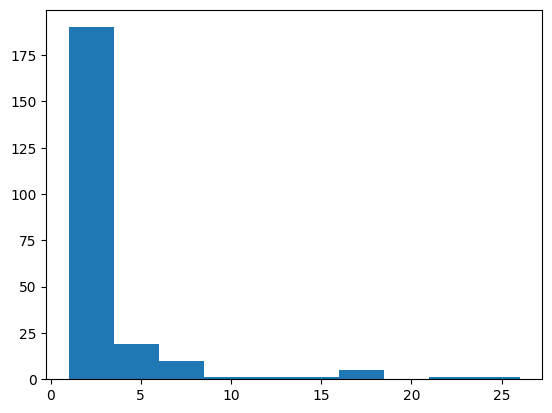

In [3]:
# select the relevant variables
X_ml = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_ml = data['icu_days']

# test/train split
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X_ml, y_ml, test_size=0.2, random_state=10)

print(f'There are {len(y_train_ml)} training instances and {len(y_test_ml)} testing instances')

# train the model and make predictions
model_ml = LinearRegression()
model_ml.fit(X_train_ml, y_train_ml)
y_prediction_ml = model_ml.predict(X_test_ml)

plt.figure()
plt.hist(y_test_ml)

The feature variables explain -20.332239887321514% of the variance in number of ICU days
The root mean squared error is 3.7915072996013843


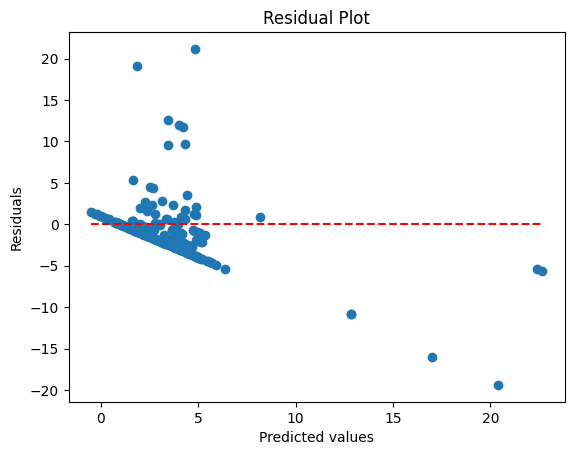

In [4]:
# Coefficient of Determination (R²):
# R² explains the proportion of variance in the target variable that is explained by the predictors.
r2_ml = r2_score(y_test_ml, y_prediction_ml)
print(f'The feature variables explain {100*r2_ml}% of the variance in number of ICU days')

rmse_ml = mean_squared_error(y_test_ml, y_prediction_ml, squared = False)
print(f'The root mean squared error is {rmse_ml}')

# plotting residuals
residuals_ml = y_test_ml - y_prediction_ml
plt.scatter(y_prediction_ml, residuals_ml)
plt.hlines(0, min(y_prediction_ml), max(y_prediction_ml), colors="r", linestyles="dashed")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Logistic Regression (ICU)

Predict whether or not someone will have long or short ICU stay.

In [5]:
X_lr_icu = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_lr_icu = data['inpatient']

X_train_lr_icu, X_test_lr_icu, y_train_lr_icu, y_test_lr_icu = train_test_split(X_lr_icu, y_lr_icu, test_size=0.2, random_state=42)
print(f'There are {len(y_train_lr_icu)} training instances and {len(y_test_lr_icu)} testing instances')

# train the model and make predictions
model_lr_icu = LogisticRegression(class_weight="balanced", solver='liblinear', random_state=42)
model_lr_icu.fit(X_train_lr_icu, y_train_lr_icu)
y_prediction_lr_icu = model_lr_icu.predict(X_test_lr_icu)

There are 913 training instances and 229 testing instances


In [6]:
accuracy_icu = accuracy_score(y_test_lr_icu, y_prediction_lr_icu)
print("Accuracy:", accuracy_icu)

# Classification Report
print("Classification Report:\n", classification_report(y_test_lr_icu, y_prediction_lr_icu))

Accuracy: 0.6986899563318777
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.63      0.73       146
           1       0.56      0.82      0.66        83

    accuracy                           0.70       229
   macro avg       0.71      0.72      0.70       229
weighted avg       0.75      0.70      0.70       229



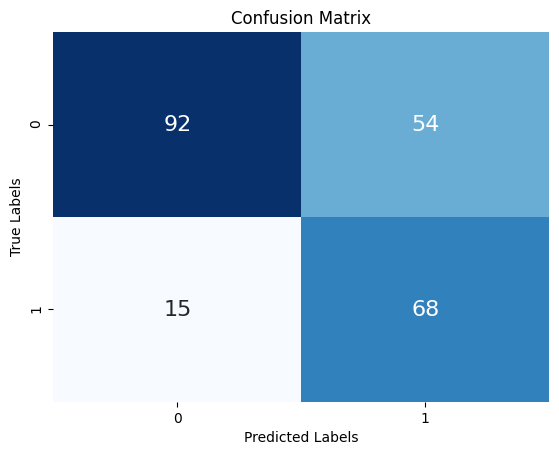

In [7]:
# confusion matrix visualization

cm_icu = confusion_matrix(y_test_lr_icu, y_prediction_lr_icu)

plt.figure()
sns.heatmap(cm_icu, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Random Forest (ICU)

There are 913 training instances and 229 testing instances
Accuracy: 0.7292576419213974
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80       146
           1       0.67      0.49      0.57        83

    accuracy                           0.73       229
   macro avg       0.71      0.68      0.69       229
weighted avg       0.72      0.73      0.72       229



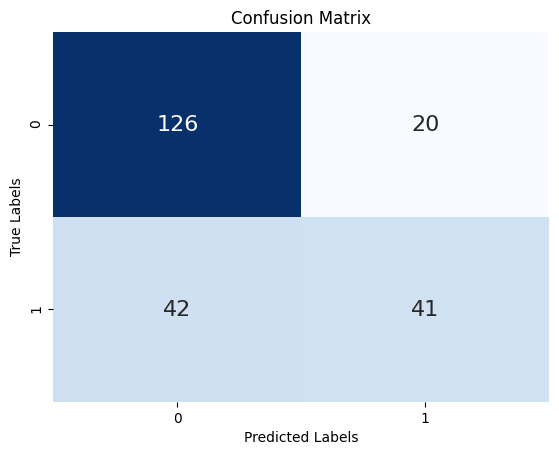

In [8]:
X_rf_icu = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_rf_icu = data['inpatient']

X_train_rf_icu, X_test_rf_icu, y_train_rf_icu, y_test_rf_icu = train_test_split(X_rf_icu, y_rf_icu, test_size=0.2, random_state=42)
print(f'There are {len(y_train_rf_icu)} training instances and {len(y_test_rf_icu)} testing instances')

clf_icu = RandomForestClassifier(n_estimators=100, random_state=42)
clf_icu.fit(X_train_rf_icu, y_train_rf_icu)

y_pred_rf_icu = clf_icu.predict(X_test_rf_icu)



accuracy_rf_icu = accuracy_score(y_test_rf_icu, y_pred_rf_icu)
print("Accuracy:", accuracy_rf_icu)

# Classification Report
print("Classification Report:\n", classification_report(y_test_rf_icu, y_pred_rf_icu))

cm_rf_icu = confusion_matrix(y_test_rf_icu, y_pred_rf_icu)

plt.figure()
sns.heatmap(cm_rf_icu, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XGBoost (ICU)

There are 913 training instances and 229 testing instances
Accuracy: 0.7074235807860262
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       146
           1       0.62      0.49      0.55        83

    accuracy                           0.71       229
   macro avg       0.68      0.66      0.67       229
weighted avg       0.70      0.71      0.70       229



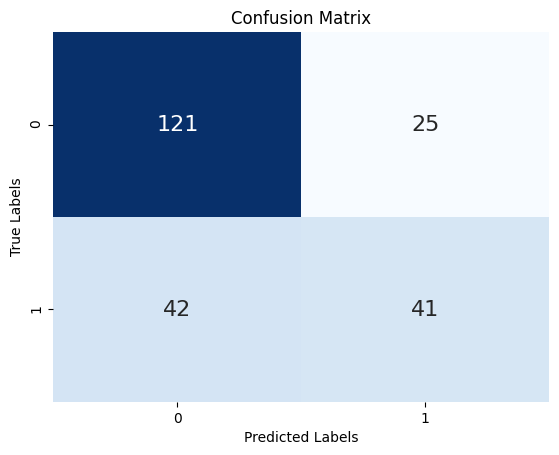

In [9]:
X_xgb_icu = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_xgb_icu = data['inpatient']

X_train_xgb_icu, X_test_xgb_icu, y_train_xgb_icu, y_test_xgb_icu = train_test_split(X_xgb_icu, y_xgb_icu, test_size=0.2, random_state=42)
print(f'There are {len(y_train_xgb_icu)} training instances and {len(y_test_xgb_icu)} testing instances')

xgb_icu = xgb.XGBClassifier()
xgb_icu.fit(X_train_xgb_icu, y_train_xgb_icu)

y_pred_xgb_icu = xgb_icu.predict(X_test_xgb_icu)



accuracy_xgb_icu = accuracy_score(y_test_xgb_icu, y_pred_xgb_icu)
print("Accuracy:", accuracy_xgb_icu)

# Classification Report
print("Classification Report:\n", classification_report(y_test_xgb_icu, y_pred_xgb_icu))

cm_xgb_icu = confusion_matrix(y_test_xgb_icu, y_pred_xgb_icu)

plt.figure()
sns.heatmap(cm_xgb_icu, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# XGBoost Regression (Length of ICU Stay)

There are 913 training instances and 229 testing instances


(array([190.,  19.,  10.,   1.,   1.,   1.,   5.,   0.,   1.,   1.]),
 array([ 1. ,  3.5,  6. ,  8.5, 11. , 13.5, 16. , 18.5, 21. , 23.5, 26. ]),
 <BarContainer object of 10 artists>)

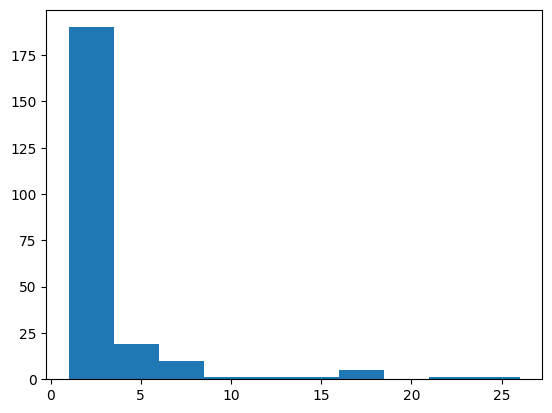

In [10]:
# select the relevant variables
X_xgb_licu = data[['Age', 'Ht', 'Wt', 'Sex', 'OP_time', 'Open', 'Robotic', 'Videoscopic']]
y_xgb_licu = data['icu_days']

# test/train split
X_train_xgb_licu, X_test_xgb_licu, y_train_xgb_licu, y_test_xgb_licu = train_test_split(X_xgb_licu, y_xgb_licu, test_size=0.2, random_state=10)

print(f'There are {len(y_train_xgb_licu)} training instances and {len(y_test_xgb_licu)} testing instances')

# train the model and make predictions
xgb_licu = xgb.XGBRegressor()
xgb_licu.fit(X_train_xgb_licu, y_train_xgb_licu)

y_pred_xgb_licu = xgb_licu.predict(X_test_xgb_licu)

plt.figure()
plt.hist(y_test_xgb_licu)

The feature variables explain -434.27645427343384% of the variance in number of ICU days
The root mean squared error is 7.989211410261266


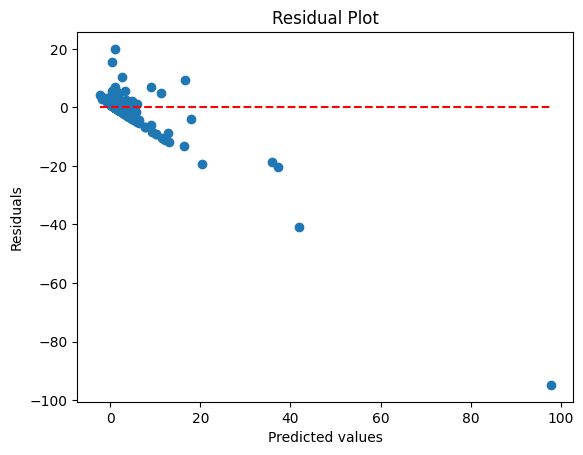

In [11]:
# Coefficient of Determination (R²):
# R² explains the proportion of variance in the target variable that is explained by the predictors.
r2_xgb_licu = r2_score(y_test_xgb_licu, y_pred_xgb_licu)
print(f'The feature variables explain {100*r2_xgb_licu}% of the variance in number of ICU days')

rmse_xgb_licu = mean_squared_error(y_test_xgb_licu, y_pred_xgb_licu, squared = False)
print(f'The root mean squared error is {rmse_xgb_licu}')

# plotting residuals
residuals_xgb_licu = y_test_xgb_licu - y_pred_xgb_licu
plt.scatter(y_pred_xgb_licu, residuals_xgb_licu)
plt.hlines(0, min(y_pred_xgb_licu), max(y_pred_xgb_licu), colors="r", linestyles="dashed")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

# Cross-Validation

From PyCaret, we found that the best model was GradientBoostingClassifier. We will use cross-validation to determine the best hyperparameters.

In [21]:
gbc_param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

In [22]:
X = data.drop(columns=['icu_days','inpatient'])
y = data['inpatient']

clf = GradientBoostingClassifier()

inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3) # for hyperparameters
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=3) # for evaluation

optimal_params = []  
roc_auc_scores = [] 

for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    grid_search = GridSearchCV(estimator=clf, param_grid=gbc_param_grid, cv=inner_cv, scoring='roc_auc')
    grid_search.fit(X_train, y_train)

    optimal_params.append(grid_search.best_params_)
    roc_auc_scores.append(grid_search.score(X_test, y_test))

print("Nested CV ROC AUC:", np.mean(roc_auc_scores))
print("Optimal Parameters from each fold:")
print(optimal_params)

Nested CV ROC AUC: 0.7548086200559535
Optimal Parameters from each fold:
[{'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}, {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}]
